# Spring Mass Simulation using RK4
## Simulation Code



In [10]:
import numpy as np
def forwardEuler(f, t_i, y_i, dt):
    # f : derivative function
    # t_i: current time, 
    # y_i: current value
    # dt: stepsize
    y_next = y_i + dt*f(t_i, y_i) # next_value
    return y_next

t0=0
y0=0
def f(y,t):
    return y - np.sin(t)
t = t0
y = y0
k = 10**(-2)
while t < 1:
    y_next = forwardEuler(f, t, y, k)
    y = y_next
    t = t + k

print(y)

0.3671460645786982


In [164]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

import seaborn as sns
sns.set_style('darkgrid')

In [5]:
def forwardEuler(f, t_i, y_i, dt):
  y_next = y_i + dt*f(t_i, y_i)
  return y_next

def rungeKutta2(f, t_i, y_i, dt):
  y_star = forwardEuler(f, t_i, y_i, dt)
  An = f(t_i, y_i)
  Bn = f(t_i + dt, y_star)
  better_slope = (An + Bn) / 2

  y_next = y_i + dt*better_slope
  return y_next 

def rungeKutta4(f, t_i, y_i, dt):
  f_1 = f(t_i, y_i)
  f_2 = f(t_i + dt/2, y_i + (1/2)*dt*f_1)
  f_3 = f(t_i + dt/2, y_i + (1/2)*dt*f_2)
  f_4 = f(t_i + dt, y_i + dt*f_3)

  y_next = y_i + (1/6)*dt*(f_1 + 2*f_2 + 2*f_3 + f_4)

  return y_next

In [9]:
class Spring_Mass:

    def __init__(self, x0, v0, dt, length = 3, m = 0.25, k = 42, damping = 0):

        self.length = length # length of the spring at rest
        self.xs = [x0] # initial position
        self.vs = [v0] # initial velocity
        self.m = m # mass of the object
        self.k = k # spring constant
        self.beta = damping # damping coefficient
        self.ts = [0.0]
        self.a_s = []
        self.dt = dt #timestep

        self.states = [(x0, v0)]

        self.omega = np.sqrt(self.k/self.m) 

    def get_acceleration(self):
        a_next = (1/self.m) * (-self.beta*self.vs[-1] - self.k*self.xs[-1])
        self.a_s.append(a_next)
    
    def derivatives(self, t, state):
        k = self.k
        m = self.m
        beta = self.beta

        x = state[0]
        v = state[1]

        x_prime = v
        v_prime = (1/m) * (-beta*v - k*x)

        return np.array((x_prime, v_prime))
    
    def update_euler(self):
        self.get_acceleration()
        v_next = self.vs[-1] + self.a_s[-1] * self.dt
        x_next = self.xs[-1] + self.vs[-1] * self.dt

        self.vs.append(v_next)
        self.xs.append(x_next)

        t_next = self.ts[-1] + self.dt
        self.ts.append(t_next)   

    def update_euler_cromer(self):
        self.get_acceleration()
        v_next = self.vs[-1] + self.a_s[-1] * self.dt
        x_next = self.xs[-1] + v_next * self.dt

        self.vs.append(v_next)
        self.xs.append(x_next)

        t_next = self.ts[-1] + self.dt
        self.ts.append(t_next)     

    def updateRK4(self):
        state_next = rungeKutta4(self.derivatives, self.ts[-1], self.states[-1], self.dt)
        self.states.append(state_next)

        t_next = self.ts[-1] + self.dt
        self.ts.append(t_next)

        self.xs.append(state_next[0])
        self.vs.append(state_next[1])

    def updateRK2(self):
        state_next = rungeKutta2(self.derivatives, self.ts[-1], self.states[-1], self.dt)
        self.states.append(state_next)

        t_next = self.ts[-1] + self.dt
        self.ts.append(t_next)

        self.xs.append(state_next[0])
        self.vs.append(state_next[1])

    def display(self):
        current_x = self.xs[-1]
        a = [-3, current_x]
        b = [0, 0]
        if a[-1] < 0:
            plt.plot(a, b, color = 'blue')
        else:
            plt.plot(a, b, color = 'green')
        plt.scatter([current_x],[0], s = 1000, color = 'red')
        plt.vlines(0, -2, 2, linestyles='dotted')

        plt.xlim(-3, 5)
        plt.title("Time = "+str(np.round(self.ts[-1], 2)))

        plt.show()
    
    def update_exact(self):
        '''
        Exact solution of the undamped mass spring system
        '''
        x_next = x0 * np.cos(self.omega * self.ts[-1])
        v_next = -x0 * self.omega * np.sin(self.omega * self.ts[-1])
        
        self.xs.append(x_next)
        self.vs.append(v_next)

        t_next = self.ts[-1] + self.dt
        self.ts.append(t_next)

    def update(self, method = 'RK4'):
        if method == 'Euler':
            self.update_euler()
        elif method == 'RK4':
            self.updateRK4()
        elif method == 'RK2':
            self.updateRK2()
        elif method == 'exact':
            self.update_exact()
        elif method == 'Euler-Cromer':
            self.update_euler_cromer()

## Testing the simulation

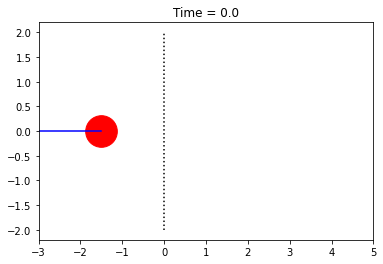

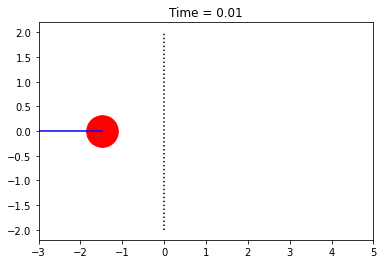

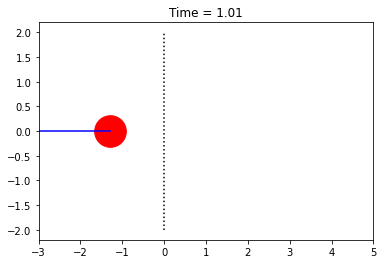

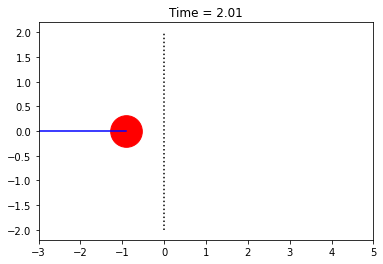

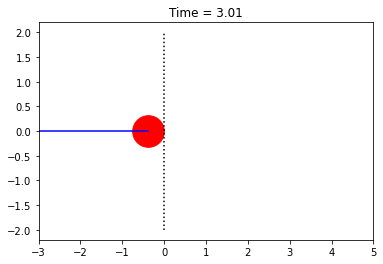

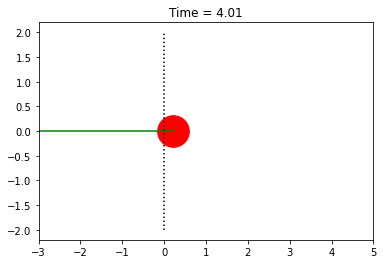

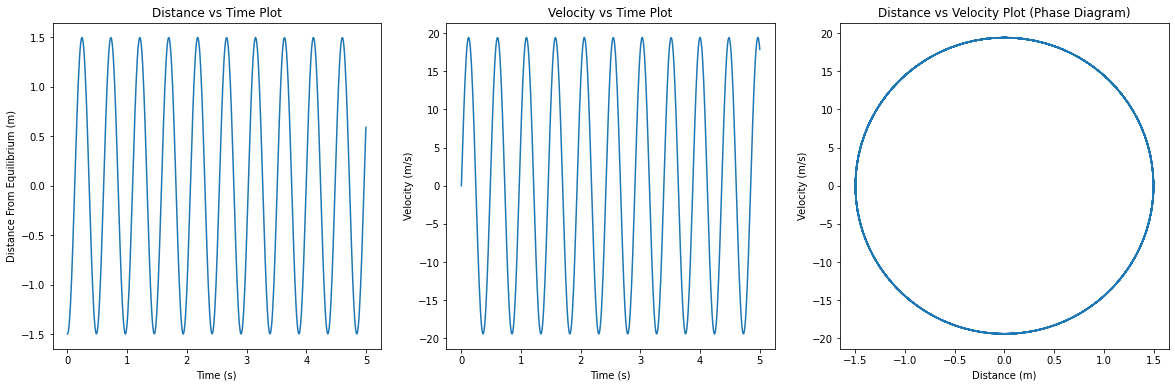

In [47]:
# Test Case
m = 0.25 
k = 42
damping = 0

x0 = -1.5
v0 = 0.0
dt = 0.01

spring_mass = Spring_Mass(x0, v0, dt=dt, damping=0)
spring_mass.display()

for i in range(500):
    spring_mass.update()
    if i%100 == 0:
        spring_mass.display()

plt.figure(figsize = (20,6))

plt.subplot(131)
plt.plot(spring_mass.ts, spring_mass.xs)
plt.xlabel('Time (s)')
plt.ylabel('Distance From Equilibrium (m)')
plt.title('Distance vs Time Plot')

plt.subplot(132)
plt.plot(spring_mass.ts, spring_mass.vs)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time Plot')

plt.subplot(133)
plt.plot(spring_mass.xs, spring_mass.vs)
plt.title('Distance vs Velocity Plot (Phase Diagram)')
plt.xlabel('Distance (m)')
plt.ylabel('Velocity (m/s)')

plt.show()

## Animation

In [178]:
import math

# This code for genarating a spring was taken from 
# N.R. Syed, Spring, (2018), GitHub repository, https://github.com/nrsyed/utilities/tree/master/spring 

def spring(start, end, nodes, width):
    """!
    Return a list of points corresponding to a spring.
    @param r1 (array-like) The (x, y) coordinates of the first endpoint.
    @param r2 (array-like) The (x, y) coordinates of the second endpoint.
    @param nodes (int) The number of spring "nodes" or coils.
    @param width (int or float) The diameter of the spring.
    @return An array of x coordinates and an array of y coordinates.
    """

    # Check that nodes is at least 1.
    nodes = max(int(nodes), 1)

    # Convert to numpy array to account for inputs of different types/shapes.
    start, end = np.array(start).reshape((2,)), np.array(end).reshape((2,))

    # If both points are coincident, return the x and y coords of one of them.
    if (start == end).all():
        return start[0], start[1]

    # Calculate length of spring (distance between endpoints).
    length = np.linalg.norm(np.subtract(end, start))

    # Calculate unit vectors tangent (u_t) and normal (u_t) to spring.
    u_t = np.subtract(end, start) / length
    u_n = np.array([[0, -1], [1, 0]]).dot(u_t)

    # Initialize array of x (row 0) and y (row 1) coords of the nodes+2 points.
    spring_coords = np.zeros((2, nodes + 2))
    spring_coords[:,0], spring_coords[:,-1] = start, end

    # Check that length is not greater than the total length the spring
    # can extend (otherwise, math domain error will result), and compute the
    # normal distance from the centerline of the spring.
    normal_dist = math.sqrt(max(0, width**2 - (length**2 / nodes**2))) / 2

    # Compute the coordinates of each point (each node).
    for i in range(1, nodes + 1):
        spring_coords[:,i] = (
            start
            + ((length * (2 * i - 1) * u_t) / (2 * nodes))
            + (normal_dist * (-1)**i * u_n))

    return spring_coords[0,:], spring_coords[1,:]

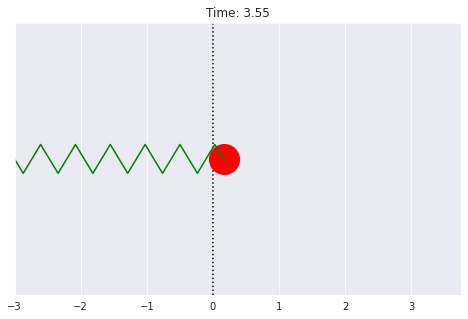

In [192]:
m = 0.25 
k = 42
damping = 0.25 # animation with damping looks nicer

x0 = -2.5
v0 = 0.0
dt = 0.01

spring_mass = Spring_Mass(x0, v0, dt=dt, damping=damping)

#############
# ANIMATION #
#############

#%matplotlib notebook

# create figure, axis, and lines for drawing
lines  = [None, None]
fig    = plt.figure(figsize =(8,5))
ax     = plt.subplot(xlim = (-3, abs(x0)*1.5), ylim = (-2, 2))

nodes = 12
width = 0.5

# initialize lines to certain values
current_x = spring_mass.xs[-1]
start = (-3, 0)
end = (current_x, 0)
x_coords, y_coords = spring(start, end, nodes, width)

lines[0], = ax.plot([current_x], [0], ms = 30, color = 'red', marker = 'o') 
if current_x < 0:
    lines[1], = ax.plot(x_coords, y_coords, color = 'blue')
else:
    lines[1], = ax.plot(x_coords, y_coords, color = 'green')


ax.set_yticks([])
ax.vlines(0, -2, 2, linestyles = 'dotted')
ax.set_title(f'Time: {np.round(spring_mass.ts[-1], 2)}')

def animate(i):
    for _ in range(5):
        spring_mass.update()

    current_x = spring_mass.xs[-1]
    current_x = spring_mass.xs[-1]
    end = (current_x, 0)
    x_coords, y_coords = spring(start, end, nodes, width)

    lines[0].set_data(current_x, 0)
    lines[1].set_data(x_coords, y_coords)
    if current_x < 0:
        lines[1].set_color('blue')
    else:
        lines[1].set_color('green')
    ax.set_title(f'Time: {np.round(spring_mass.ts[-1], 2)}')
    return lines
    
    
# starts animation
#from IPython.display import HTML
ani = animation.FuncAnimation(fig, animate, np.arange(1, 70), interval = 150, blit = True)
HTML(ani.to_html5_video())

# Order of a Method

In [193]:
def testNumericalMethod(numerical_method, f, y0, interval, dt):
    '''
    Input:
    numerical_method - method to use to predict the system
    y0 - initial value/state of the system
    f - derivative of the system
    interval - the time interval
    dt - stepsize

    Output:
    t - times of all of the steps in given interval 
    y - values of the system at corresponding time
    '''
    t = np.arange(interval[0], interval[1]+dt, dt)
    y = [y0]

    for i in range(len(t)-1):
    y_next = numerical_method(f, t[i], y[i], dt)
    y.append(y_next) 

    return t, y

In [195]:
def get_odex(numerical_method):
    '''
    Return a ode solver function which will output the values of 
    the system at corresponding times in the given interval
    '''
    def odex(f, y0, interval, dt):
    return testNumericalMethod(numerical_method, f, y0, interval, dt)
    return odex


In [194]:
from numpy import log2

def orderx(odex, reduction_factor=2):
    F = lambda t,y: 1/((1+t)**2) 
    t0 = 0
    tfinal = 1
    vexact = lambda t: 1/(t+1)
    y0 = 0

    #Choose a step size.
    h = 0.1
    tout, yout = odex(F, y0, (t0, tfinal), h)
    v1 = yout[-1]

    #Reduce the step size, e.g., by a factor of 2.
    h = h/reduction_factor
    tout2, yout2 = odex(F, y0, (t0, tfinal), h)
    v2 = yout2[-1]

    #Compare the ratio of the error for the different step sizes
    ratio = (v1 - vexact(tfinal))/(v2 - vexact(tfinal))

    #Determine the order of the ratio relative to a base of 2
    p = round(log2(ratio) / log2(reduction_factor))
    return ratio, p


In [201]:
ode1 = get_odex(forwardEuler)
ode2 = get_odex(rungeKutta2)
ode4 = get_odex(rungeKutta4)

order1 = []
order2 = []
order4 = []

factors = [2,4,6,8]
for factor in factors:
  ratio_ode1, p_ode1 = orderx(ode1, reduction_factor=factor)
  order1.append(ratio_ode1)
  ratio_ode2, p_ode2 = orderx(ode2, reduction_factor=factor)
  order2.append(ratio_ode2)
  ratio_ode4, p_ode4 = orderx(ode4, reduction_factor=factor)
  order4.append(ratio_ode4)

print('Euler: ', p_ode1)
print('RK2: ', p_ode2)
print('RK4: ', p_ode4)

Euler:  1
RK2:  2
RK4:  4


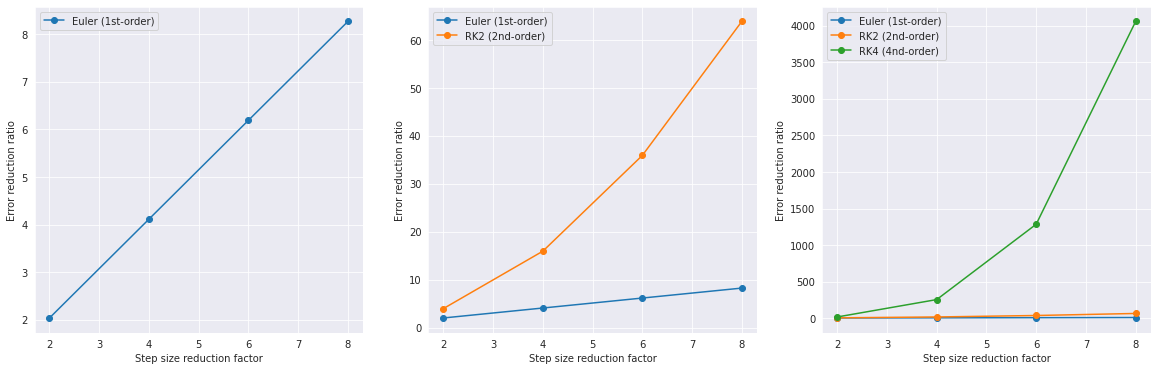

In [202]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.plot(factors, order1, marker='o', label='Euler (1st-order)')
plt.legend()
plt.xlabel("Step size reduction factor")
plt.ylabel("Error reduction ratio")

plt.subplot(1,3,2)
plt.plot(factors, order1, marker='o', label='Euler (1st-order)')
plt.plot(factors, order2, marker='o', label='RK2 (2nd-order)')
plt.legend()
plt.xlabel("Step size reduction factor")
plt.ylabel("Error reduction ratio")

plt.subplot(1,3,3)
plt.plot(factors, order1, marker='o', label='Euler (1st-order)')
plt.plot(factors, order2, marker='o', label='RK2 (2nd-order)')
plt.plot(factors, order4, marker='o', label='RK4 (4nd-order)')
plt.legend()
plt.xlabel("Step size reduction factor")
plt.ylabel("Error reduction ratio")
plt.show()

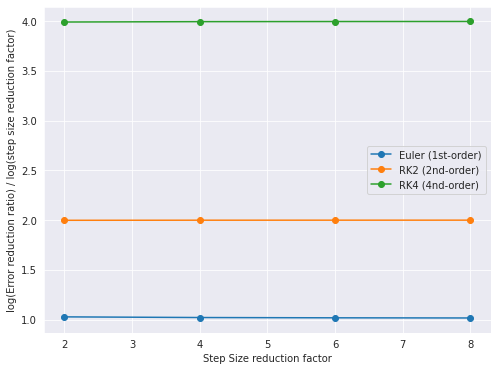

In [203]:
plt.figure(figsize=(8,6))
plt.plot(factors, np.log(order1)/np.log(factors), marker='o', label='Euler (1st-order)')
plt.plot(factors, np.log(order2)/np.log(factors), marker='o', label='RK2 (2nd-order)')
plt.plot(factors, np.log(order4)/np.log(factors), marker='o', label='RK4 (4nd-order)')
plt.legend()
plt.xlabel("Step Size reduction factor")
plt.ylabel("log(Error reduction ratio) / log(step size reduction factor)")
plt.show()

# Damped-Spring-Mass Simulation

## Critical Damping

When the damping coefficient is low, the system still oscillates but the amplitude decreases and it comes to rest eventually. It is called an ***underdamped system***. If the coefficient increases, at one point the system comes to rest even without any oscillation, which is called ***critically damped***.

Now let's consider the given system with m = 0.25 and k = 30.

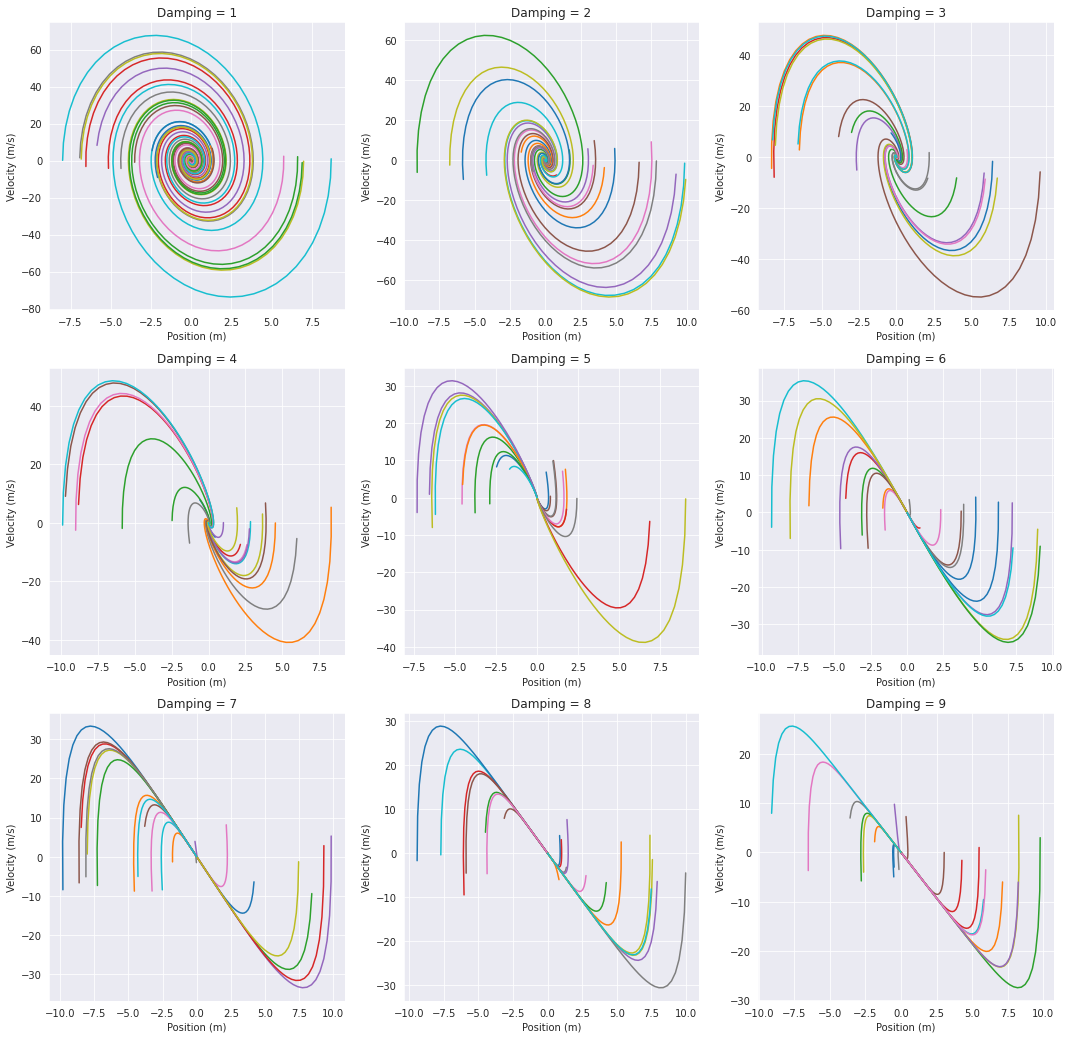

In [213]:
dt = 0.01
m = 0.25
k = 30

dampings = [1,2,3,4,5,6,7,8,9]
iterations = 20

plt.figure(figsize = (18, 18))

for i in range(len(dampings)):
    damping = dampings[i]

    plt.subplot(3,3,i+1)
    for _ in range(iterations):
        x0 = np.random.uniform(-10,10)
        v0 = np.random.uniform(-10,10)
        spring_mass = Spring_Mass(x0, v0, dt, k = k, m = m, damping = damping)

        for _ in range(200):
            spring_mass.update(method = 'RK4')

        plt.plot(spring_mass.xs, spring_mass.vs)

    plt.title('Damping = '+str(damping) )
    plt.xlabel('Position (m)')
    plt.ylabel('Velocity (m/s)')

    #plt.legend()    
plt.show()

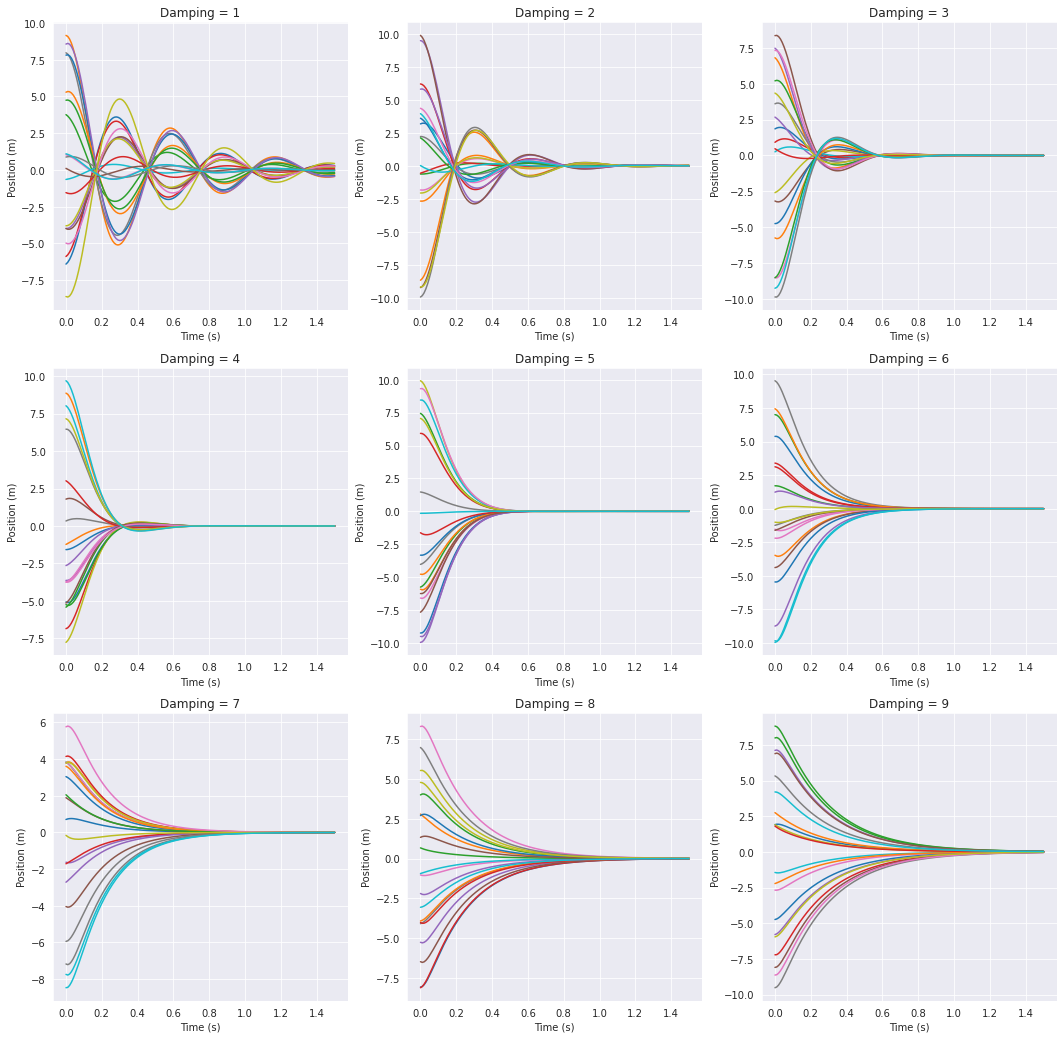

In [70]:
dt = 0.01
m = 0.25
k = 30

dampings = [1,2,3,4,5,6,7,8,9]
iterations = 20

plt.figure(figsize = (18, 18))

for i in range(len(dampings)):
    damping = dampings[i]

    plt.subplot(3,3,i+1)
    n_crossed_equilibriam = 0
    for _ in range(iterations):
        x0 = np.random.uniform(-10,10)
        v0 = np.random.uniform(-10,10)
        spring_mass = Spring_Mass(x0, v0, dt, k = k, m = m, damping = damping)

        for _ in range(150):
            spring_mass.update(method = 'RK4')
        
        plt.plot(spring_mass.ts, spring_mass.xs)

    plt.title('Damping = '+str(damping) )
    plt.xlabel('Time (s)')
    plt.ylabel('Position (m)')
   
plt.show()

It seems like the critical damping is between 5 and 6 as this is where we can find a straight line in the phase diagram and also we cannot see oscillations in the position vs time graph.

But let's define a metric to determine the critical damping even better. We can assume that, at critical temperature most of the time the mass will never cross the equilibrium position. So in every iteration, we can try to check if the mass crosses the equilibrium or not. We did that by multiplying the first and last value of the sorted position of the mass. If it didn't cross, then both should have similar sign and their multiplication must be positive.

Then we calculated the proportion of time where the mass crosses the equilibrium.

In [78]:
dt = 0.01
m = 0.25
k = 30

dampings = np.linspace(3,8,11)
iterations = 20
prop_crossing = []

for i in range(len(dampings)):
    damping = dampings[i]

    n_crossed_equilibriam = 0
    for _ in range(iterations):
        x0 = np.random.uniform(-10,10)
        v0 = np.random.uniform(-10,10)
        spring_mass = Spring_Mass(x0, v0, dt, k = k, m = m, damping = damping)

        for _ in range(150):
            spring_mass.update(method = 'RK4')
            
        if (sorted(spring_mass.xs)[-1] * sorted(spring_mass.xs)[0]) < 0:
             n_crossed_equilibriam += 1
    
    prop_crossing.append(n_crossed_equilibriam/iterations)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


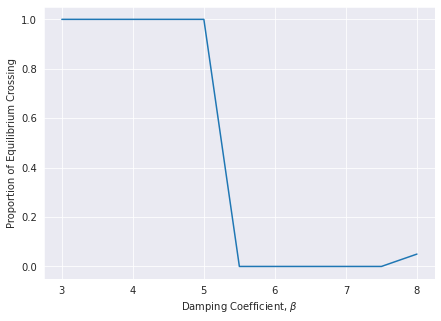

In [79]:
plt.figure(figsize=(7,5))
sns.lineplot(dampings, prop_crossing)
plt.ylabel('Proportion of Equilibrium Crossing')
plt.xlabel('Damping Coefficient, $\\beta$')
plt.show()

At $\beta = 5$, the mass crosses the equilibrium in all iterations, while at $\beta = 5.5$, the mass never crosses the equilibrium position.

So, from the empirical analysis, we can say that the critical damping, $\beta_{crit}$ is most likely in between 5 to 5.5.



## Varying spring constant, k

In [127]:
dt = 0.01
m = 0.25
k_s = np.array([15,30,45,60])

dampings = np.linspace(2,9,15)
iterations = 50
prop_crossing_k = np.zeros((len(k_s), len(dampings)))

for i in range(len(k_s)):
    k = k_s[i]

    for j in range(len(dampings)):
        damping = dampings[j]
        n_crossed_equilibriam = 0
        for _ in range(iterations):
            x0 = np.random.uniform(-10,10)
            v0 = np.random.uniform(-10,10)
            spring_mass = Spring_Mass(x0, v0, dt, k = k, m = m, damping = damping)

            for _ in range(150):
                spring_mass.update(method = 'RK4')
                
            if (sorted(spring_mass.xs)[-1] * sorted(spring_mass.xs)[0]) < 0:
                n_crossed_equilibriam += 1
        
        prop_crossing_k[i,j] = n_crossed_equilibriam/iterations

    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

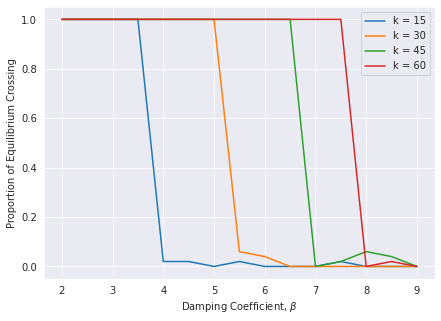

In [128]:
plt.figure(figsize=(7,5))
for i in range(len(k_s)):
    sns.lineplot(dampings, prop_crossing_k[i], label = f'k = {k_s[i]}')
    plt.ylabel('Proportion of Equilibrium Crossing')
    plt.xlabel('Damping Coefficient, $\\beta$')
plt.show()

We can assume that, at critical temperature most of the time the mass will never cross the equilibrium position. So we can define the critical damping $\beta_{crit}$ as the value of $\beta$ where the proportion of equilibrium crossing becomes less than 10% (i.e. < 0.1). 

We can also plot the ratio of the spring constant compared to the our first system $(k = 15)$ and the ratio of the critical damping with the critical damping for the first system.

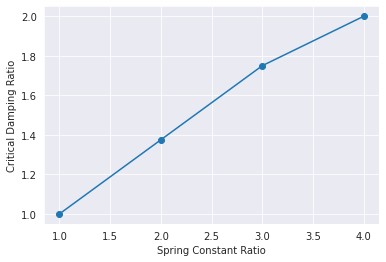

In [129]:
index = np.argmax(prop_crossing_k < 0.1, axis=1)
crit_damp_k = np.array(dampings[index])

plt.plot(k_s/k_s[0], crit_damp_k/crit_damp_k[0], marker = 'o')
plt.xlabel('Spring Constant Ratio')
plt.ylabel('Critical Damping Ratio')
plt.show()

We can see that when k becomes double, critical damping becomes around $1.4$ times or around $\sqrt{2}$ times. Similarly, when k becomes 4 times, $\beta_{crit}$ becomes 2 times.

So most probably the proportional relationship is,
$$
\beta_{crit} \propto \sqrt{k}
$$
or
$$
\log \beta_{crit} = 0.5 \log k + C 
$$

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


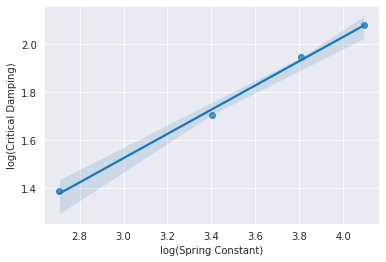

In [139]:
sns.regplot(np.log(k_s), np.log(crit_damp_k))
plt.xlabel('log(Spring Constant)')
plt.ylabel('log(Critical Damping)')
plt.show()

In [155]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(np.log(k_s).reshape(-1,1), np.log(crit_damp_k))
reg.coef_

array([0.50552067])

## Varying mass, m

In [209]:
dt = 0.01
m_s = np.array([0.25,0.5,0.75,1])
k = 15

dampings = np.linspace(2,9,15)
iterations = 50
prop_crossing_m = np.zeros((len(m_s), len(dampings)))

for i in range(len(m_s)):
    m = m_s[i]

    for j in range(len(dampings)):
        damping = dampings[j]
        n_crossed_equilibriam = 0
        for _ in range(iterations):
            x0 = np.random.uniform(-20,20)
            v0 = np.random.uniform(-20,20)
            spring_mass = Spring_Mass(x0, v0, dt, k = k, m = m, damping = damping)

            for _ in range(200):
                spring_mass.update(method = 'RK4')
                
            if (sorted(spring_mass.xs)[-1] * sorted(spring_mass.xs)[0]) < 0:
                n_crossed_equilibriam += 1
        
        prop_crossing_m[i,j] = n_crossed_equilibriam/iterations

    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

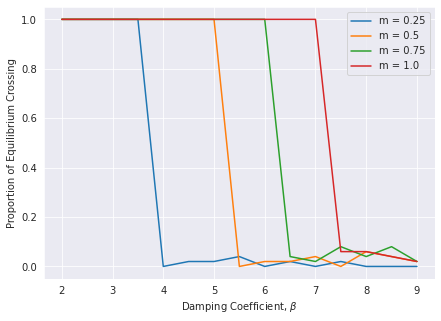

In [210]:
plt.figure(figsize=(7,5))
for i in range(len(m_s)):
    sns.lineplot(dampings, prop_crossing_m[i], label = f'm = {m_s[i]}')
    plt.ylabel('Proportion of Equilibrium Crossing')
    plt.xlabel('Damping Coefficient, $\\beta$')
plt.show()

Let's plot the ratio of the mass compared to the our first system $(m = 0.25)$ and the ratio of the critical damping with the critical damping for the first system.

The critical damping is defined again at the point where less than 10% of the time, the mass crosses the equilibrium.

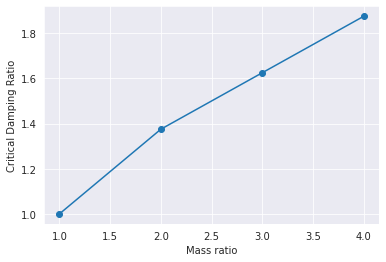

In [211]:
index = np.argmax(prop_crossing_m < 0.1, axis=1)
crit_damp_m = np.array(dampings[index])

plt.plot(m_s/m_s[0], crit_damp_m/crit_damp_m[0], marker = 'o')
plt.xlabel('Mass ratio')
plt.ylabel('Critical Damping Ratio')
plt.show()

We can see that when m becomes double, critical damping becomes around $1.4$ times or around $\sqrt{2}$ times. Similarly, when m becomes 4 times, $\beta_{crit}$ becomes approximately 2 times.

So most probably the proportional relationship is,
$$
\beta_{crit} \propto \sqrt{m}
$$
or
$$
\log \beta_{crit} = 0.5 \log m + C 
$$

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


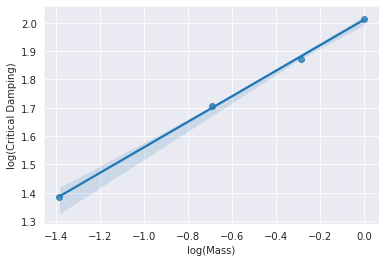

In [212]:
sns.regplot(np.log(m_s), np.log(crit_damp_m))
plt.xlabel('log(Mass)')
plt.ylabel('log(Critical Damping)')
plt.show()

In [157]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(np.log(m_s).reshape(-1,1), np.log(crit_damp_m))
reg.coef_

array([0.44950851])

## 3.3 Theoretical Analysis

Considering the damping, our equation of motion become:
\begin{align*}
    F_{spring} &= -kx\\
    F_{damping} &= -\beta v\\
    F_{total} &= F_{damping} + F_{spring}\\
    ma &= - \beta v -kx \\
    m\ddot{x} &= -\beta \dot{x} - kx\\
    m\ddot{x} +\beta \dot{x} + kx &= 0
\end{align*}

Using a differential equation solver (I used symbolab), the general solution can be written as,
$$
x(t) = c_1 e^{\lambda_1 t} + c_2 e^{\lambda_2 t}
$$
where,
$$
\lambda_{1,2} = \frac{-\beta\pm \sqrt{\beta^2 - 4mk}}{2m}
$$


When the term $\sqrt{\beta^2 - 4mk}$ becomes imaginary (i.e. $\beta^2 < 4mk$), $\lambda_{1,2}$ become two complex conjugates and using Euler's formula we can represent the $x(t)$ as an oscillation function. This is when the underdamping happens and the system keeps oscillating before finally coming into rest.

When the term $\sqrt{\beta^2 - 4mk}$ becomes real (i.e. $\beta^2 > 4mk$), $\lambda_{1,2}$ become two distinct real numbers. The largest value possible for $\sqrt{\beta^2 - 4mk}$ is $\beta$ and we have another $-\beta$ term in the numerator of $\lambda_{1,2}$. So $x(t)$ becomes a decay function and the system comes to rest without any oscillaton. This is the overdamped situation.


So, the critical damping happens when
\begin{align*}
    \sqrt{\beta^2 - 4mk} &= 0\\ 
    \Rightarrow \beta^2 &= 4mk\\
    \Rightarrow \beta &= \sqrt{4mk}
\end{align*}
This is the first time when the system starts to come to rest without any oscilltion. 

Thus, from theory we can say that,
$$
\beta_{crit} \propto \sqrt{k}
$$
and 
$$
\beta_{crit} \propto \sqrt{m}
$$

For **3.1**, we have k = 30, m = 0.25.
\begin{align*}
    \beta_{crit} &= \sqrt{4mk}\\
    &= \sqrt{4\cdot 0.25\cdot 30}\\
    &= 5.48 
\end{align*}

Our empirical value was around 5.5 (between 5 to 5.5), which is pretty close to the theoretical value.

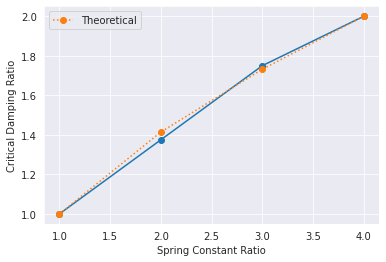

In [205]:
plt.plot(k_s/k_s[0], crit_damp_k/crit_damp_k[0], marker = 'o')
plt.plot(k_s/k_s[0], (k_s/k_s[0])**0.5, ":", marker = 'o', label = 'Theoretical')
plt.xlabel('Spring Constant Ratio')
plt.ylabel('Critical Damping Ratio')
plt.legend()
plt.show()

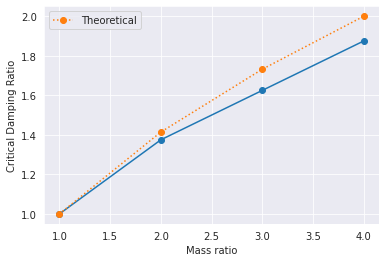

In [208]:
plt.plot(m_s/m_s[0], crit_damp_m/crit_damp_m[0], marker = 'o')
plt.plot(m_s/m_s[0], (m_s/m_s[0])**0.5, ":", marker = 'o', label = 'Theoretical')
plt.xlabel('Mass ratio')
plt.ylabel('Critical Damping Ratio')
plt.legend()
plt.show()

We can say that the empirical analysis agrees with the theoretical analysis most of the time. 

Only for higher mass, the empirical value for $\beta_{crit}$ is a little bit lower than the theoretical values. One possible reason could be that when the system is near the critical damping, the force become very small when it is close to equilibrium. So for a higher mass, it takes a lot of time to cross the equilibrium and again come back. So maybe during the amount of time that we run the empirical model, the system which was near critical value was very close to the equilibrium but did not cross the equilibrium yet. And as it didn't cross the equilibrium, according to our chosen metric, maybe we considered it as a critical system. This is why our empirical $\beta_{crit}$ is a bit lower for higher mass system.